In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_excel('train.xlsx')

In [3]:
test_df = pd.read_excel('test.xlsx')

In [4]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
train_df = train_df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis = 1)

In [6]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,non-stop,3897
1,Air India,Kolkata,Banglore,2 stops,7662
2,Jet Airways,Delhi,Cochin,2 stops,13882
3,IndiGo,Kolkata,Banglore,1 stop,6218
4,IndiGo,Banglore,New Delhi,1 stop,13302


In [7]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [8]:
train_df.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    1
Price          0
dtype: int64

In [9]:
train_df['Total_Stops'] = train_df['Total_Stops'].fillna(0)

In [10]:
train_df.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Price          0
dtype: int64

In [11]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [12]:
test_df = test_df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis = 1)

In [13]:
test_df.head()

,Airline,Source,Destination,Total_Stops
0,Jet Airways,Delhi,Cochin,1 stop
1,IndiGo,Kolkata,Banglore,1 stop
2,Jet Airways,Delhi,Cochin,1 stop
3,Multiple carriers,Delhi,Cochin,1 stop
4,Air Asia,Banglore,Delhi,non-stop


In [14]:
test_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [15]:
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [16]:
test_df.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
dtype: int64

In [17]:
# because train_df has target column thats why we extract the target column
y = train_df['Price'].values

In [18]:
train_df.drop('Price', axis = 1, inplace = True)

In [19]:
final_df = train_df.append(test_df)

In [20]:
final_df.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,0.0
1,Air India,Kolkata,Banglore,2.0
2,Jet Airways,Delhi,Cochin,2.0
3,IndiGo,Kolkata,Banglore,1.0
4,IndiGo,Banglore,New Delhi,1.0


In [21]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')

In [22]:
final_df = pd.get_dummies(final_df, columns = ['Airline', 'Source', 'Destination', 'Total_Stops'])

In [23]:
final_df.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_0.0,Total_Stops_1.0,Total_Stops_2.0,Total_Stops_3.0,Total_Stops_4.0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Airline_Air Asia                           13354 non-null  uint8
 1   Airline_Air India                          13354 non-null  uint8
 2   Airline_GoAir                              13354 non-null  uint8
 3   Airline_IndiGo                             13354 non-null  uint8
 4   Airline_Jet Airways                        13354 non-null  uint8
 5   Airline_Jet Airways Business               13354 non-null  uint8
 6   Airline_Multiple carriers                  13354 non-null  uint8
 7   Airline_Multiple carriers Premium economy  13354 non-null  uint8
 8   Airline_SpiceJet                           13354 non-null  uint8
 9   Airline_Trujet                             13354 non-null  uint8
 10  Airline_Vistara                            1335

In [25]:
train_df.shape

(10683, 4)

In [26]:
test_df.shape

(2671, 4)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# now the feature columns
X = final_df.head(10683).values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
my_model = LinearRegression()

In [32]:
my_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
prediction = my_model.predict(X_test)

In [34]:
from sklearn.metrics import explained_variance_score

In [35]:
print(explained_variance_score(y_test, prediction))

-5.779515130035399e+20


In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
my_model1 = RandomForestRegressor()

In [38]:
my_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
prediction = my_model1.predict(X_test)

In [40]:
print(explained_variance_score(y_test, prediction))

0.637920868106981


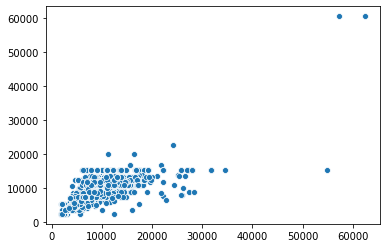

In [41]:
sns.scatterplot(y_test, prediction)

In [42]:
import pickle

In [43]:
pickle.dump(my_model1, open('flight_price.pkl', 'wb'))

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
import numpy as np

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 600, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
model = RandomizedSearchCV(RandomForestRegressor(), param_grid, verbose = 2)

In [49]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=0, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=0, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must b

[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.2s
[CV] n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.2s
[CV] n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.1s
[CV] n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.1s
[CV] n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=381, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=15, total=   3.0s
[CV] n_estimators=218, min_samples_split=2,

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimato

[CV]  n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=436, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=218, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [50]:
model.best_params_

{'n_estimators': 381,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [51]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=381, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
prediction1 = model.predict(X_test)

In [53]:
print(explained_variance_score(y_test, prediction1))

0.6369444816462013
